In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sklearn

import peplearn as pl

In [11]:
# 595 different physiochemical properties.  flip pattern adds 595 more. 
# sliding window adss 595*(L + L-1 + L-2 ... L - (L-1)) -> 45815 for a 12 aa peptide
simple_features = pl.features.SimpleFeatures(use_flip_pattern=True,
                                             use_sliding_windows=5)

# Set of 28 cider parameters (isoelectric point, kappa, fx proline, etc.)
cider_features = pl.features.CiderFeatures(use_sliding_windows=True)

In [20]:
cider_features.num_features

364

In [13]:
obs = pl.Observations("junk.txt")
obs.add_features(simple_features)
obs.add_features(cider_features)

In [14]:
obs.calc_features(2)

In [17]:
weights = np.exp(-obs.training_values) # in this dataset, -log is good.

n: 40, r2: 0.731
aaindex_pca_9_pos2_length4  2.25
aaindex_pca_12_pos9_length2  1.43
aaindex_pca_9_pos0_length4  1.08
aaindex_pca_10_pos10_length1  0.92
aaindex_pca_10_pos4_length4  0.88
   knob_mc_b_pos3_length3  0.87
aaindex_pca_7_pos3_length4  0.76
aaindex_pca_9_pos0_length5  0.70
      dS_exu_pos2_length2  0.69
aaindex_pca_10_pos10_length2  0.68
     dS_buex_pos0_length2  0.59
aaindex_pca_18_pos6_length2  0.58
aaindex_pca_5_pos8_length4  0.57
aaindex_pca_16_pos2_length4  0.55
aaindex_pca_9_pos2_length2  0.48
      volume_pos4_length2  0.43
      dS_exu_pos1_length3  0.39
aaindex_pca_10_pos1_length4  0.39
aaindex_pca_16_pos9_length3  0.39
    cf_alpha_pos5_length2  0.39


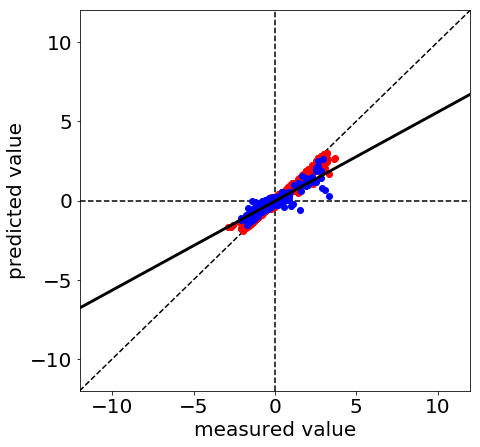

In [18]:
from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=40)

fst.fit(obs.training_features, obs.training_values,sample_weight=weights) 
pl.plot.correlation(obs,fst)

print("n: {:d}, r2: {:.3f}".format(fst.n_estimators,fst.score(obs.test_features,obs.test_values)))

order = np.argsort(fst.feature_importances_)
order = order[::-1]
for i in order[:20]:
    print("{:>25s}{:6.2f}".format(obs.feature_names[i],100*fst.feature_importances_[i]))

In [31]:
import copy

a = copy.deepcopy(obs)

In [32]:
a.add_classes([1])

(array([ 3821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   272.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

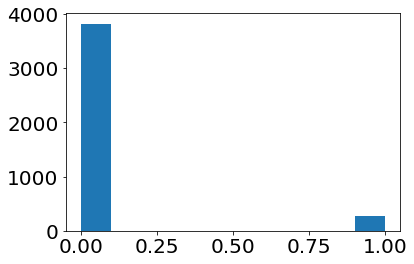

In [33]:
plt.hist(a.training_values)

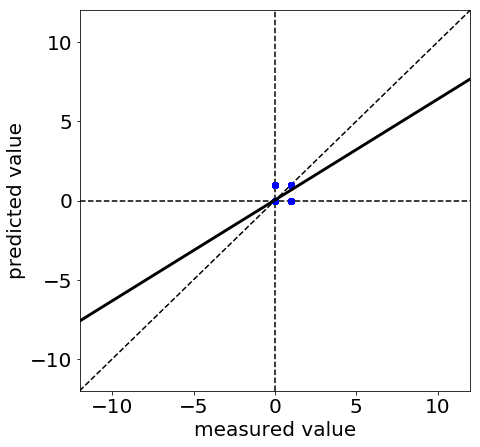

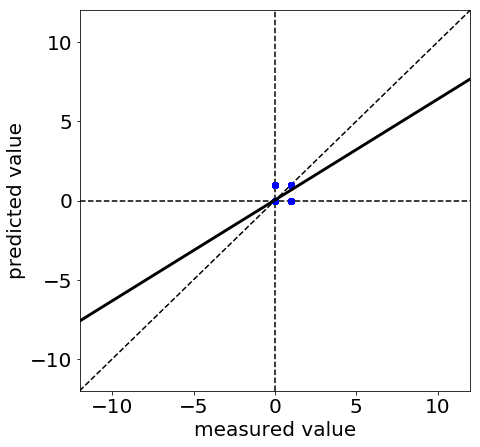

In [37]:
from sklearn import tree 

# UNCOMMENT YOUR FAVORITE DECISION TREE TO TRY

#tre = sklearn.tree.DecisionTreeRegressor()
#tre = sklearn.tree.ExtraTreeRegressor()
tre = sklearn.tree.DecisionTreeClassifier()

tre.fit(a.training_features, a.training_values) 
pl.plot.correlation(a,tre)



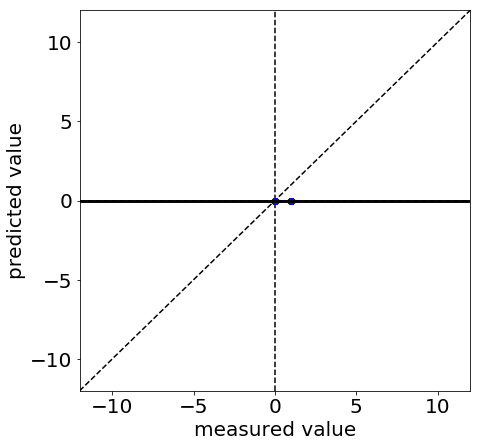

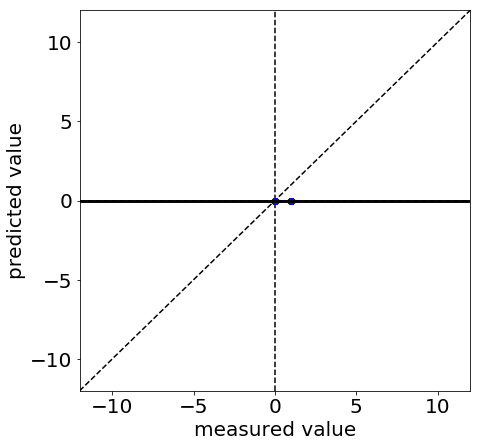

In [35]:
from sklearn import linear_model

# UNCOMMENT YOUR FAVORITE LINEAR MODEL TO TRY

#clf = sklearn.linear_model.BayesianRidge(alpha_1=0.0001)
#clf = sklearn.linear_model.ElasticNet()
#clf = sklearn.linear_model.LassoLars(alpha=0.1)
clf = sklearn.linear_model.Perceptron() # requires classes
#clf = sklearn.linear_model.PassiveAggressiveRegressor()
#clf = sklearn.linear_model.RANSACRegressor()
#clf = sklearn.linear_model.SGDRegressor()

clf.fit(a.training_features, a.training_values) 
pl.plot.correlation(a,clf)

In [ ]:
from sklearn import svm

# UNCOMMENT YOUR FAVORITE SUPPORT VECTOR MACHINE TO TRY

sv = sklearn.svm.SVR()
#sv = sklearn.svm.NuSVR()

sv.fit(obs.training_features, obs.training_values) 
pl.plot.correlation(obs,sv)